[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: Eye Color
Quantitative: A persons age
Discrete: The number of students in a classroom
Continuous: A persons height


**Problem 2**. Analyze the Carbon_West data file using the following code.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
carbon_west.head(10)


,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions.

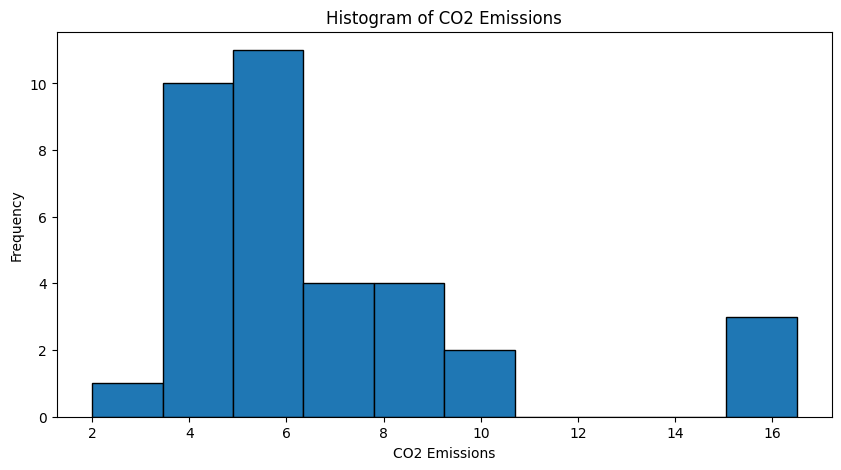

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [16]:
mean_co2 = carbon_west['CO2'].mean()
median_co2 = carbon_west['CO2'].median()
std_co2 = carbon_west['CO2'].std()

print(f"Mean of CO2 Emissions: {mean_co2:.2f}")
print(f"Median of CO2 Emissions: {median_co2:.2f}")
print(f"Standard Deviation of CO2 Emissions: {std_co2:.2f}")

Mean of CO2 Emissions: 6.72
Median of CO2 Emissions: 5.90
Standard Deviation of CO2 Emissions: 3.36


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [17]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders.head(10)


,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6
5,CO,3.9
6,CT,2.8
7,DE,5.6
8,FL,5.0
9,GA,6.7


Part a. Find the mean and standard deviation for murders without D.C.

In [18]:
mean_murders = murders['murder'].mean()
std_murders = murders['murder'].std()

print(f"Mean of Murder Rates: {mean_murders:.2f}")
print(f"Standard Deviation of Murder Rates: {std_murders:.2f}")

Mean of Murder Rates: 5.25
Standard Deviation of Murder Rates: 3.73


Part b. Find the five-number  summary without D.C.

In [19]:
murders_without_dc = murders[murders['state'] != 'DC']
q1 = murders_without_dc['murder'].quantile(0.25)
q3 = murders_without_dc['murder'].quantile(0.75)
median = murders_without_dc['murder'].median()
min = murders_without_dc['murder'].min()
max = murders_without_dc['murder'].max()
mean = murders_without_dc['murder'].mean()
std = murders_without_dc['murder'].std()

print(f"Minimum Murder Rate: {min:.2f}")
print(f"First Quartile (Q1): {q1:.2f}")
print(f"Median (Q2): {median:.2f}")
print(f"Third Quartile (Q3): {q3:.2f}")
print(f"Maximum Murder Rate: {max:.2f}")
print(f"Mean of Murder Rates: {mean:.2f}")
print(f"Standard Deviation of Murder Rates: {std:.2f}")

murders_without_dc.describe()






Minimum Murder Rate: 1.00
First Quartile (Q1): 2.62
Median (Q2): 4.85
Third Quartile (Q3): 6.17
Maximum Murder Rate: 12.40
Mean of Murder Rates: 4.87
Standard Deviation of Murder Rates: 2.59


,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [20]:
murders.describe()

,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [21]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(10)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


Part a. Construct a scatterplot between square feet and price of a home.

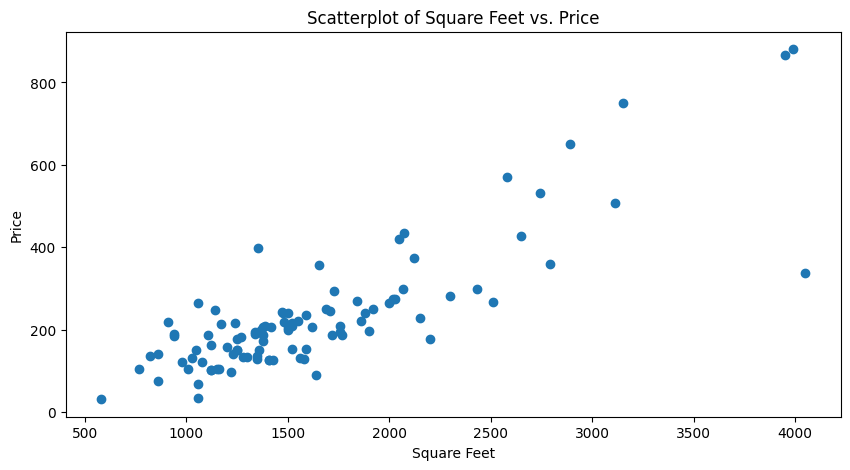

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price')
plt.show()

Part b. Find the correlation between the two variables.

In [23]:
correlation = houses['size'].corr(houses['price'])
print(f"Correlation between Square Feet and Price: {correlation:.2f}")

Correlation between Square Feet and Price: 0.83


Part c. Find and plot the regression line on top of the scatterplot.

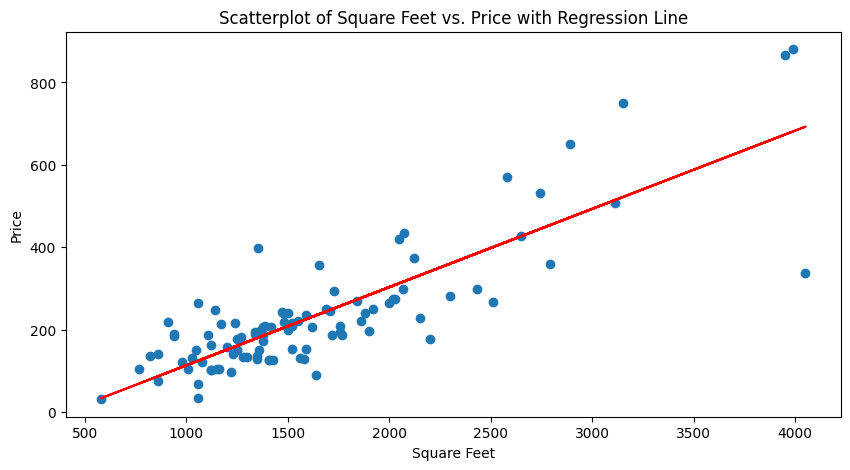

In [24]:
slope, intercept = np.polyfit(houses['size'], houses['price'], 1)
plt.figure(figsize=(10, 5))
plt.scatter(houses['size'], houses['price'])
plt.plot(houses['size'], slope * houses['size'] + intercept, color='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price with Regression Line')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

/tmp/ipython-input-1387663536.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']], labels=['New', 'Not New'])


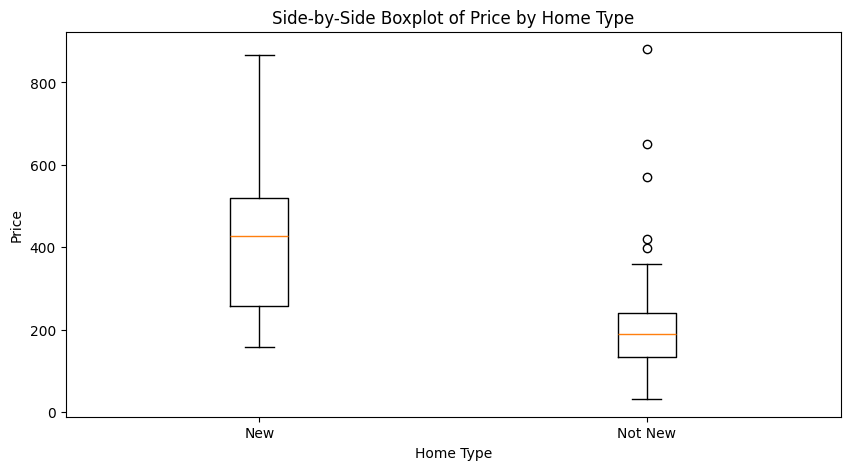

In [25]:
plt.figure(figsize=(10, 5))
plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']], labels=['New', 'Not New'])
plt.xlabel('Home Type')
plt.ylabel('Price')
plt.title('Side-by-Side Boxplot of Price by Home Type')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

For the relationship between size and price there seems to be a strong, positive linear relationship between the size of a home and its price. As the size increases so does the price.

For the relationship between price and whether the house is new or not, the plot shows new homes generally have a higher median price and a wide range of prices compared to not new homes. Meaning that new homes tend to be more spread out than older homes and more expensive.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [26]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
contingency_table = pd.crosstab(happy['marital'], happy['happiness'])
print(contingency_table)


happiness    1  1     1  1     2  1     3    2  2     1  2     2  2     3  \
marital                                                                     
fe         348        0        0        0  642        0        0        0   
fem          0        5        0        0    0        0        0        0   
mal          0      107       33       56    0      229      114      210   
male         0       99        0        0    0        0        0        0   

happiness    3  3     1  3     2  3     3  
marital                                    
fe         153        0        0        0  
fem          0        0        0        0  
mal          0       33       45       68  
male         0        0        0        0  
